In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #used to generate labels from folder names
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

(474, 514, 3)

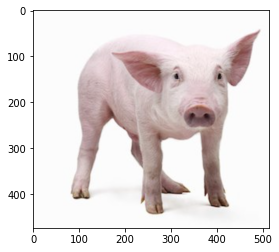

In [2]:
img = image.load_img("Semantic_Category/training/living/3.PNG")
plt.imshow(img)
cv2.imread("Semantic_Category/training/living/3.PNG").shape

In [8]:
dataset, info = tfds.load(name='cats_vs_dogs', split=tfds.Split.TRAIN, with_info=True)
assert isinstance(dataset, tf.data.Dataset)
print(dataset)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
def preprocess(features):
    print(features['image'], features['label'])
    image = tf.image.resize(features['image'], [200,200])
    image = tf.divide(image, 255)
    print(image)
    label = features['label']
    print(label)
    return image, tf.cast(label, tf.float32)

In [3]:
train = ImageDataGenerator(rescale = 1/255) #RBG values range from 0 to 255
validation = ImageDataGenerator(rescale = 1/255)

In [4]:
train_dataset = train.flow_from_directory('Semantic_Category/training',
                                         target_size = (200,200), 
                                         batch_size = 3, 
                                         class_mode = 'binary')
validation_dataset = train.flow_from_directory('Semantic_Category/validation',
                                         target_size = (200,200), 
                                         batch_size = 3, 
                                         class_mode = 'binary')

Found 20 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'living': 0, 'nonliving': 1}

In [6]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #16 filters in this convolutional layer 
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #32 filters
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ## 64 filters
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')   #sigmoid for binary class                                                   
                                    ])

In [7]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr= 0.001),
             metrics = ['accuracy'])

In [8]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs= 20,
                     validation_data = validation_dataset)

Epoch 1/20
3/3 [==============================] - 1s 273ms/step - loss: 4.3279 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.4000
Epoch 2/20
3/3 [==============================] - 1s 218ms/step - loss: 0.7343 - accuracy: 0.6250 - val_loss: 0.8112 - val_accuracy: 0.6000
Epoch 3/20
3/3 [==============================] - 1s 204ms/step - loss: 0.5468 - accuracy: 0.7500 - val_loss: 1.5334 - val_accuracy: 0.6000
Epoch 4/20
3/3 [==============================] - 1s 216ms/step - loss: 0.8967 - accuracy: 0.3750 - val_loss: 0.5999 - val_accuracy: 0.8000
Epoch 5/20
3/3 [==============================] - 1s 232ms/step - loss: 0.9175 - accuracy: 0.6250 - val_loss: 0.6733 - val_accuracy: 0.4000
Epoch 6/20
3/3 [==============================] - 1s 223ms/step - loss: 0.9967 - accuracy: 0.7500 - val_loss: 0.5757 - val_accuracy: 0.6000
Epoch 7/20
3/3 [==============================] - 1s 232ms/step - loss: 0.6581 - accuracy: 0.7500 - val_loss: 0.5956 - val_accuracy: 0.8000
Epoch 8/20
3/3 [====

In [9]:
validation_dataset.class_indices

{'living': 0, 'nonliving': 1}

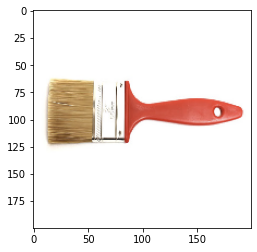

Living


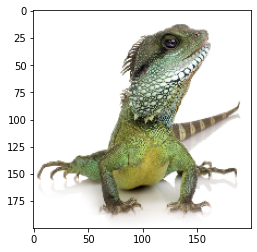

Living


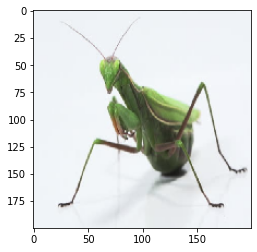

Living


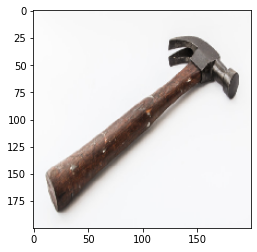

Nonliving


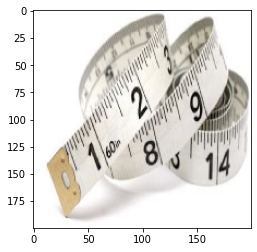

Nonliving


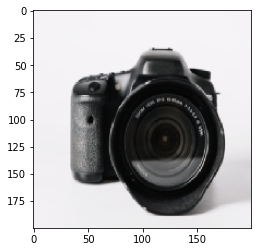

Living


In [10]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

dir_path = 'Semantic_Category/testing'
for i in listdir_nohidden(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img) 
    X = np.expand_dims(X, axis = 0) 
    images = np.vstack([X])
    #prepares images for analysis
    
    val = model.predict(images)
    if val == 0:
       print("Living")
    else:
       print("Nonliving")    